In [56]:
import urllib
import cStringIO
from IPython.display import Image
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("../Code")
import utils
import os
import numpy as np
%matplotlib inline 

In [57]:
dataset= pd.read_csv("../Data/Intermediate_files/hh_data_2011_cluster_minHH.csv")
output_image_dir='../Data/bingmap_matching_lsms/'
#dataset= pd.read_csv("../Data/Intermediate_files/hh_village_coord_fcs.csv")

In [58]:
raster_file = '../Data/Satellite/NightLight/F182013.v4c_web.stable_lights.avg_vis.tif'
x_size, top_left_x_coords, top_left_y_coords, centroid_x_coords, centroid_y_coords, bands_data = utils.read_raster(raster_file)

In [59]:
imagerySet="Aerial"
centerPoint="47.610,-122.107"
BingMapsKey="AmzJBkuslQlPtUYv0sYdZ7HXcu3jhtTVqUpAhRr_uSrEO1Zeoci5RTOlkYRfE_tn"
zoomLevel="16"
mapSize="400,500"

In [60]:
url="http://dev.virtualearth.net/REST/v1/Imagery/Map/"+imagerySet+"/"+centerPoint+"/"+zoomLevel+"?mapSize="+mapSize+"&key="+BingMapsKey

In [61]:
a = urllib.urlopen(url).read()
b = cStringIO.StringIO(a)
image = ndimage.imread(b, mode='RGB')
misc.imsave(output_image_dir + "test.jpg", image[50:450, :, :])

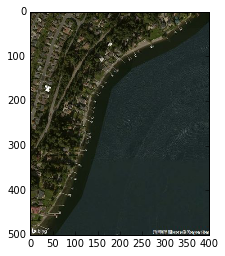

In [62]:
plt.imshow(image)
plt.show()

In [63]:
list_i=[]
list_j=[]
for index, row in dataset.iterrows():
    i,j=utils.get_cell_idx(row['gpsLongitude'],row['gpsLatitude'], top_left_x_coords, top_left_y_coords)
    list_i.append(i)
    list_j.append(j)

In [64]:
from retrying import retry
#@retry(wait_exponential_multiplier=1000, wait_exponential_max=3600000)
def save_img(url, file_path, file_name):
    a = urllib.urlopen(url).read()
    b = cStringIO.StringIO(a)
    image = ndimage.imread(b, mode='RGB')
    if (image[:,:,0].reshape(-1)==245).sum()>10000:
        pass
    else:
        misc.imsave(file_path + file_name, image[50:450, :, :])

In [65]:
m = 1
for i,j in zip(list_i,list_j):
        lon = centroid_x_coords[i]
        lat = centroid_y_coords[j]
        centerPoint=str(lat)+","+str(lon)
        url = "http://dev.virtualearth.net/REST/v1/Imagery/Map/"+imagerySet+"/"+centerPoint+\
        "/"+zoomLevel+"?mapSize="+mapSize+"&key="+BingMapsKey
        lightness = bands_data[j, i, 0]
        file_path = output_image_dir + str(lightness) + '/'
        if not os.path.isdir(file_path):
            os.makedirs(file_path)
        file_name = str(i) + '_' + str(j) +'.jpg'
        save_img(url, file_path, file_name)
        if m % 100 == 0:
            print m
        m += 1

100
200
300


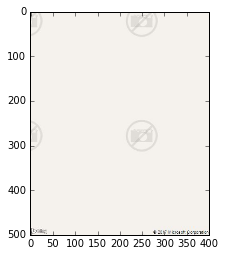

In [66]:
i=25463
j=8935
lon = centroid_x_coords[i]
lat = centroid_y_coords[j]
centerPoint=str(lat)+","+str(lon)
url = "http://dev.virtualearth.net/REST/v1/Imagery/Map/"+imagerySet+"/"+centerPoint+\
"/"+zoomLevel+"?mapSize="+mapSize+"&key="+BingMapsKey
lightness = bands_data[j, i, 0]
file_path = output_image_dir + str(lightness) + '/'
if not os.path.isdir(file_path):
    os.makedirs(file_path)
file_name = str(i) + '_' + str(j) +'.jpg'
a = urllib.urlopen(url).read()
b = cStringIO.StringIO(a)
image = ndimage.imread(b, mode='RGB')
plt.imshow(image[:,:,:])
plt.show()

In [67]:
np.array_equal(image[:20,:20,:],image[20:40,20:40,:])

False

In [68]:
image.shape

(500, 400, 3)

In [69]:
image[:,:,0].shape

(500, 400)

In [70]:
pd.DataFrame(image[:,:,0])

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,248,245,242,244,247,248,245,241,242,248,...,245,245,245,245,245,245,245,245,245,245
1,245,244,244,245,245,245,245,244,250,246,...,245,245,245,245,245,245,245,245,245,245
2,242,244,246,245,244,243,245,248,250,239,...,245,245,245,245,245,245,245,245,245,245
3,243,244,245,245,245,245,246,246,238,229,...,245,245,245,245,245,245,245,245,245,245
4,247,245,243,245,247,247,244,240,227,222,...,245,245,245,245,245,245,245,245,245,245
5,248,245,243,244,247,245,238,231,224,222,...,245,245,245,245,245,245,245,245,245,245
6,246,245,245,245,243,237,229,223,222,223,...,245,245,245,245,245,245,245,245,245,245
7,242,245,248,246,239,230,223,219,219,223,...,245,245,245,245,245,245,245,245,245,245
8,232,233,234,231,225,218,215,216,213,213,...,245,245,245,245,245,245,245,245,245,245
9,227,222,216,214,214,216,218,220,212,222,...,245,245,245,245,245,245,245,245,245,245


(array([  6.90000000e+01,   9.00000000e+00,   2.50000000e+01,
          3.40000000e+01,   6.90000000e+01,   1.40000000e+02,
          1.03000000e+02,   1.29000000e+02,   5.06900000e+03,
          1.94353000e+05]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

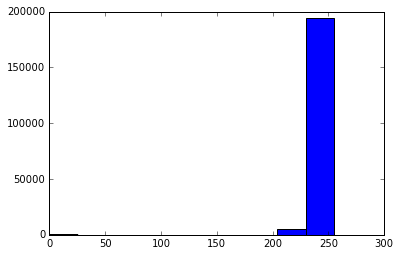

In [71]:
plt.hist(image[:,:,0].reshape(-1))

(array([  6.80000000e+01,   1.00000000e+01,   2.50000000e+01,
          3.50000000e+01,   5.50000000e+01,   1.54000000e+02,
          1.14000000e+02,   1.64000000e+02,   5.47800000e+03,
          1.93897000e+05]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

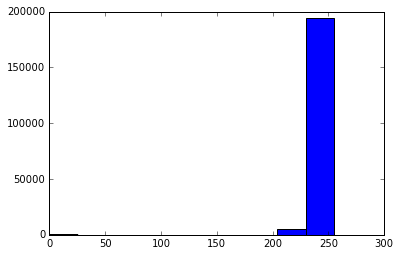

In [72]:
plt.hist(image[:,:,1].reshape(-1))

(array([  4.00000000e+01,   1.10000000e+01,   1.00000000e+01,
          4.00000000e+00,   3.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   7.00000000e+00,   6.00000000e+00,
          5.00000000e+00,   5.00000000e+00,   2.00000000e+00,
          1.10000000e+01,   1.20000000e+01,   1.00000000e+01,
          5.00000000e+00,   8.00000000e+00,   1.10000000e+01,
          2.20000000e+01,   3.50000000e+01,   3.50000000e+01,
          4.70000000e+01,   2.00000000e+01,   2.90000000e+01,
          3.50000000e+01,   2.60000000e+01,   3.20000000e+01,
          3.10000000e+01,   3.10000000e+01,   4.00000000e+01,
          5.20000000e+01,   1.56000000e+02,   2.02000000e+02,
          3.03100000e+03,   2.02800000e+03,   1.05200000e+03,
          2.08000000e+03,   1.90120000e+05,   3.66000000e+02,
          3.75000000e+02]),
 array([   0.   ,    6.375,   12.75 ,   19.125,   25.5  ,   31.875,
          38.25 ,   44.625,   51.   ,   57.375,   63.75 ,   70.125,
          76.5  ,   82.875,   

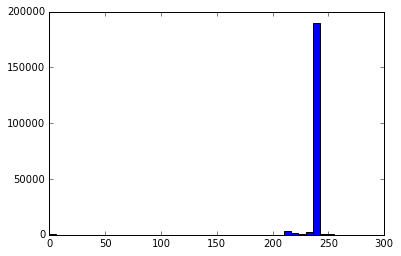

In [73]:
plt.hist(image[:,:,2].reshape(-1),bins=40)

In [74]:
(image[:,:,2].reshape(-1)==245).sum()

39

In [75]:
(image[:,:,1].reshape(-1)==245).sum()

367

In [76]:
(image[:,:,0].reshape(-1)==245).sum()>10000

True